In [1]:
import pandas as pd
import numpy as np
import math


In [6]:
pip install yahoo_fin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 3.5 MB/s 
     |████████████████████████████████| 83 kB 1.7 MB/s 
     |████████████████████████████████| 112 kB 45.2 MB/s 
     |████████████████████████████████| 127 kB 42.3 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=23849015ca2db8ca00bdea0e9f0416f04e0ef128d5e0a9d081410a12b706e41e
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=8e739667424b12aef76077c9880f724e41b177c3258c12042d5a9b19f6de5408
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=06eab0d98e63ea827220ba7aeba600499bc2f847d41817b0dd957

In [2]:
from datetime import date
from matplotlib import pyplot as plt
import datetime as dt
from matplotlib import dates

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
from yahoo_fin.stock_info import get_data

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

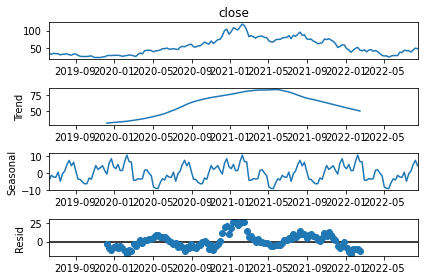

In [55]:
results = seasonal_decompose(CHWY_DF['close'])
results.plot();

In [54]:
CHWY_DF= get_data("CHWY", start_date="01/01/2010", end_date="08/18/2022", index_as_date = True, interval="1wk")
CHWY_DF

,open,high,low,close,adjclose,volume,ticker
2019-06-10,36.000000,41.340000,32.740002,34.990002,34.990002,69671400,CHWY
2019-06-17,34.720001,37.630001,31.200001,32.279999,32.279999,54768100,CHWY
2019-06-24,31.879999,35.400002,30.785000,35.000000,35.000000,15878400,CHWY
2019-07-01,35.000000,35.160000,32.500000,34.270000,34.270000,6824300,CHWY
2019-07-08,34.200001,34.799999,32.758999,33.959999,33.959999,10763100,CHWY
...,...,...,...,...,...,...,...
2022-07-18,43.389999,47.490002,42.349998,42.520000,42.520000,23903700,CHWY
2022-07-25,42.400002,42.700001,36.279999,38.810001,38.810001,23706300,CHWY
2022-08-01,38.599998,44.560001,37.549999,44.439999,44.439999,15657400,CHWY
2022-08-08,44.900002,51.869999,44.893002,49.980000,49.980000,15364100,CHWY


In [58]:
CHWY_DF.index.name = 'Date'

In [57]:
CHWY_DF.isna().sum()

open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64

In [59]:
CHWY_DF.describe()

,open,high,low,close,adjclose,volume
count,167.000000,167.000000,167.000000,167.000000,167.000000,1.670000e+02
mean,53.768814,57.542814,50.335617,53.912814,53.912814,1.917883e+07
std,23.620366,24.906806,22.236233,23.650996,23.650996,1.087964e+07
min,22.799999,23.670000,20.620001,22.889999,22.889999,6.395900e+06
25%,32.605000,35.080000,30.430000,32.680000,32.680000,1.222025e+07
50%,47.500000,51.990002,44.893002,48.130001,48.130001,1.700660e+07
75%,74.275002,76.410000,69.400002,73.935001,73.935001,2.321095e+07
max,116.250000,120.000000,107.029999,118.690002,118.690002,8.571700e+07


In [60]:
CHWY_DF = CHWY_DF.sort_values('Date')

In [68]:
close_prices = CHWY_DF['close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [69]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [70]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_9 (LSTM)               (None, 100)               80400     
                                                                 
 dense_8 (Dense)             (None, 25)                2525      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=4)

Epoch 1/4
74/74 [==============================] - 6s 36ms/step - loss: 0.0243
Epoch 2/4
74/74 [==============================] - 3s 36ms/step - loss: 0.0159
Epoch 3/4
74/74 [==============================] - 3s 36ms/step - loss: 0.0120
Epoch 4/4
74/74 [==============================] - 3s 39ms/step - loss: 0.0107


In [75]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

18.58804280830152

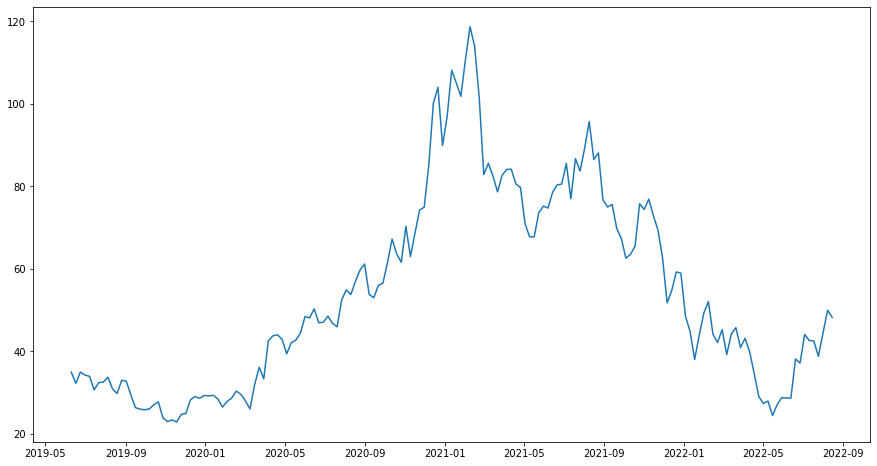

In [76]:
plt.figure(figsize=(15, 8))
plt.plot(CHWY_DF['close'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


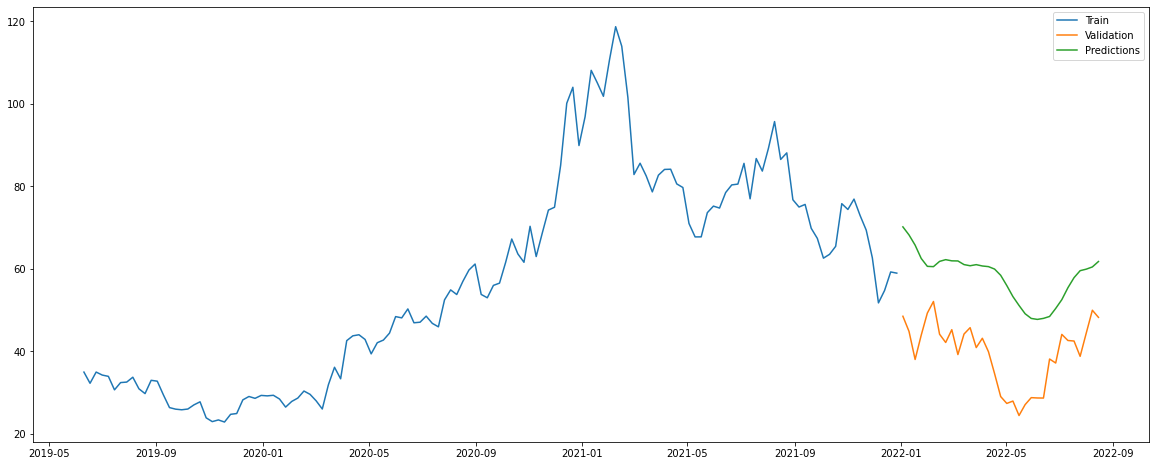

In [78]:
data = CHWY_DF.filter(['close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(20,8))
plt.plot(train)
plt.plot(validation[['close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'])

plt.show()